<a href="https://colab.research.google.com/github/susumu2357/US-patent-analysis/blob/master/colab/ELMo_BERT_USE_w2v_cosine_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import auth
auth.authenticate_user()

In [0]:
!gsutil ls gs://yohei-kikuta/mlstudy-phys/bert/data/ELMO-features/

gs://yohei-kikuta/mlstudy-phys/bert/data/ELMO-features/
gs://yohei-kikuta/mlstudy-phys/bert/data/ELMO-features/elmo_4096_training_app_3000_features.pkl.gz
gs://yohei-kikuta/mlstudy-phys/bert/data/ELMO-features/elmo_512_grants_3000+3000_features.pkl.gz
gs://yohei-kikuta/mlstudy-phys/bert/data/ELMO-features/elmo_512_test_app_3000_features.pkl.gz
gs://yohei-kikuta/mlstudy-phys/bert/data/ELMO-features/elmo_512_training_app_3000_features.pkl.gz
gs://yohei-kikuta/mlstudy-phys/bert/data/ELMO-features/elmo_full_training_app_3000_features.pkl.gz


In [0]:
!gsutil cp gs://yohei-kikuta/mlstudy-phys/bert/data/ELMO-features/elmo_512_grants_3000+3000_features.pkl.gz ./
!gsutil cp gs://yohei-kikuta/mlstudy-phys/bert/data/ELMO-features/elmo_512_test_app_3000_features.pkl.gz ./
!gsutil cp gs://yohei-kikuta/mlstudy-phys/bert/data/ELMO-features/elmo_512_training_app_3000_features.pkl.gz ./

Copying gs://yohei-kikuta/mlstudy-phys/bert/data/ELMO-features/elmo_512_grants_3000+3000_features.pkl.gz...
- [1 files][ 26.8 MiB/ 26.8 MiB]                                                
Operation completed over 1 objects/26.8 MiB.                                     
Copying gs://yohei-kikuta/mlstudy-phys/bert/data/ELMO-features/elmo_512_test_app_3000_features.pkl.gz...
- [1 files][ 12.5 MiB/ 12.5 MiB]                                                
Operation completed over 1 objects/12.5 MiB.                                     
Copying gs://yohei-kikuta/mlstudy-phys/bert/data/ELMO-features/elmo_512_training_app_3000_features.pkl.gz...
- [1 files][ 12.5 MiB/ 12.5 MiB]                                                
Operation completed over 1 objects/12.5 MiB.                                     


In [0]:
import pandas as pd

train_feature = pd.read_pickle("./elmo_512_training_app_3000_features.pkl.gz")
test_feature = pd.read_pickle("./elmo_512_test_app_3000_features.pkl.gz")
grants_feature = pd.read_pickle("./elmo_512_grants_3000+3000_features.pkl.gz")

In [0]:
train_feature[0:5]

array([[ 0.128956  ,  0.16472206, -0.52165955, ..., -0.17714106,
         0.11443898,  0.06994726],
       [ 0.33013895,  0.39714581, -0.08511961, ..., -0.08713274,
         0.23790687,  0.01566714],
       [ 0.30561352,  0.31942102, -0.23240608, ..., -0.08080294,
         0.23608324,  0.04145582],
       [ 0.32254887,  0.16824134, -0.33745036, ..., -0.04294276,
         0.09517822,  0.37336838],
       [ 0.20105894,  0.3136287 , -0.01547381, ..., -0.14848737,
         0.11447967, -0.07878248]])

In [0]:
train_feature.shape, test_feature.shape, grants_feature.shape

((3000, 1024), (3000, 1024), (6440, 1024))

#ELMo naive cosine similarity

In [0]:
%%time

import numpy as np

sim_naive = []

for i in range(len(test_feature)):
  temp = []
  
  for j in range(len(grants_feature)):
    sim = np.dot(test_feature[i] , grants_feature[j]) / (np.linalg.norm(test_feature[i]) * np.linalg.norm(grants_feature[j]))
    temp.append(sim)
    
  sim_naive.append(temp)

CPU times: user 4min 2s, sys: 966 ms, total: 4min 3s
Wall time: 4min 3s


In [0]:
!gsutil cp gs://mlstudy-phys/data/citations_info_3000+3000.df.gz ./
!gsutil cp gs://mlstudy-phys/data/testset_app_3000.df.gz ./
!gsutil cp gs://mlstudy-phys/data/grants_for_3000+3000.df.gz ./
!gsutil cp gs://mlstudy-phys/data/training_app_3000.df.gz ./  

Copying gs://mlstudy-phys/data/citations_info_3000+3000.df.gz...
/ [1 files][506.5 KiB/506.5 KiB]                                                
Operation completed over 1 objects/506.5 KiB.                                    
Copying gs://mlstudy-phys/data/testset_app_3000.df.gz...
- [1 files][ 45.5 MiB/ 45.5 MiB]                                                
Operation completed over 1 objects/45.5 MiB.                                     
Copying gs://mlstudy-phys/data/grants_for_3000+3000.df.gz...
- [1 files][129.4 MiB/129.4 MiB]                                                
Operation completed over 1 objects/129.4 MiB.                                    
Copying gs://mlstudy-phys/data/training_app_3000.df.gz...
- [1 files][ 45.0 MiB/ 45.0 MiB]                                                
Operation completed over 1 objects/45.0 MiB.                                     


In [0]:
citations_info_target = pd.read_pickle("./citations_info_3000+3000.df.gz")
test_app = pd.read_pickle("./testset_app_3000.df.gz")
grants = pd.read_pickle("./grants_for_3000+3000.df.gz")
train_app = pd.read_pickle("./training_app_3000.df.gz")

In [0]:
citations = citations_info_target[citations_info_target["action_type"] == 102]
cite_app = citations["app_id"]
cite_grant = citations ["parsed"]
cite_relation = pd.concat([cite_app, cite_grant], axis=1)

cite_relation.head()

,app_id,parsed
0,13836259,7746218
1,13836259,7746218
2,13836259,7746218
3,12097869,7402506
4,13718455,7908518


In [0]:
def test_label(app_id, grant, cite_relation):
  cited_parsed = cite_relation[cite_relation["app_id"] == app_id]["parsed"]
  return [ 1 if parsed == cited_parsed.values[0] else 0 for parsed in grant["parsed"] ]

In [0]:
%%time

ranking_naive = []

for num in range(len(sim_naive)):

  app_id = test_app["app_id"][num]
  label = pd.Series(test_label(app_id, grants, cite_relation))
    
  i, = np.where(label == 1)
  cited_index = i[0]
  rank = sorted(sim_naive[num], reverse=True).index(sim_naive[num][cited_index])
  ranking_naive.append(rank)

CPU times: user 41.7 s, sys: 121 ms, total: 41.9 s
Wall time: 41.9 s


In [0]:
%%time

ranking_arr_naive = np.array(ranking_naive)

positive_counts_naive = [sum(ranking_arr_naive <= thrd) for thrd in range(len(grants))]

CPU times: user 39.9 s, sys: 4.98 ms, total: 39.9 s
Wall time: 39.9 s


#BERT second to last average feature, naive cosine similarity

In [0]:
# second last, reduce_mean
GS_BASE="gs://mlstudy-phys/data"
TRAIN_FEATURE_FNAME="training_app_3000_raw_features_seclasmean.pkl.gz"
TEST_FEATURE_FNAME="test_app_3000_raw_features_seclasmean.pkl.gz"
GRANTS_FEATURE_FNAME="grants_3000_3000_raw_features_seclasmean.pkl.gz"

!gsutil cp {GS_BASE}/{TRAIN_FEATURE_FNAME} ./{TRAIN_FEATURE_FNAME}
!gsutil cp {GS_BASE}/{TEST_FEATURE_FNAME} ./{TEST_FEATURE_FNAME}
!gsutil cp {GS_BASE}/{GRANTS_FEATURE_FNAME} ./{GRANTS_FEATURE_FNAME}

train_app_f = pd.read_pickle(f"./{TRAIN_FEATURE_FNAME}")
test_app_f = pd.read_pickle(f"./{TEST_FEATURE_FNAME}")
grant_f = pd.read_pickle(f"./{GRANTS_FEATURE_FNAME}")

Copying gs://mlstudy-phys/data/training_app_3000_raw_features_seclasmean.pkl.gz...
- [1 files][  9.4 MiB/  9.4 MiB]                                                
Operation completed over 1 objects/9.4 MiB.                                      
Copying gs://mlstudy-phys/data/test_app_3000_raw_features_seclasmean.pkl.gz...
- [1 files][  9.4 MiB/  9.4 MiB]                                                
Operation completed over 1 objects/9.4 MiB.                                      
Copying gs://mlstudy-phys/data/grants_3000_3000_raw_features_seclasmean.pkl.gz...
- [1 files][ 20.1 MiB/ 20.1 MiB]                                                
Operation completed over 1 objects/20.1 MiB.                                     


In [0]:
train_app_f.shape, test_app_f.shape, grant_f.shape

((3000, 768), (3000, 768), (6440, 768))

In [0]:
%%time

import numpy as np

sim_naive_BERT = []

for i in range(len(test_app_f)):
  temp = []
  
  for j in range(len(grant_f)):
    sim = np.dot(test_app_f[i] , grant_f[j]) / (np.linalg.norm(test_app_f[i]) * np.linalg.norm(grant_f[j]))
    temp.append(sim)
    
  sim_naive_BERT.append(temp)

CPU times: user 4min 14s, sys: 937 ms, total: 4min 15s
Wall time: 4min 15s


In [0]:
%%time

ranking_naive_BERT = []

for num in range(len(sim_naive)):

  app_id = test_app["app_id"][num]
  label = pd.Series(test_label(app_id, grants, cite_relation))
    
  i, = np.where(label == 1)
  cited_index = i[0]
  rank = sorted(sim_naive_BERT[num], reverse=True).index(sim_naive_BERT[num][cited_index])
  ranking_naive_BERT.append(rank)

CPU times: user 41.9 s, sys: 9.01 ms, total: 41.9 s
Wall time: 41.9 s


CPU times: user 39.9 s, sys: 18 ms, total: 39.9 s
Wall time: 39.9 s


#Results

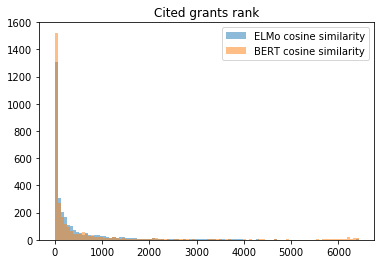

In [0]:
import matplotlib.pyplot as plt

plt.hist(ranking_naive, alpha=0.5, bins=100, label="ELMo cosine similarity")
plt.hist(ranking_naive_BERT, alpha=0.5, bins=100, label="BERT cosine similarity")
plt.title("Cited grants rank")
plt.legend()
plt.show()

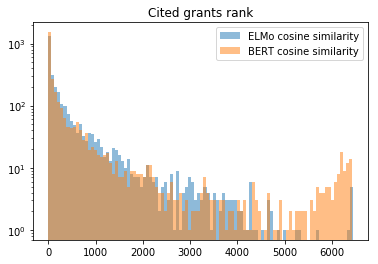

In [0]:
import matplotlib.pyplot as plt

plt.hist(ranking_naive, alpha=0.5, bins=100, label="ELMo cosine similarity")
plt.hist(ranking_naive_BERT, alpha=0.5, bins=100, label="BERT cosine similarity")
plt.yscale('log')
plt.title("Cited grants rank")
plt.legend()
plt.show()

BERTは大外しが多い

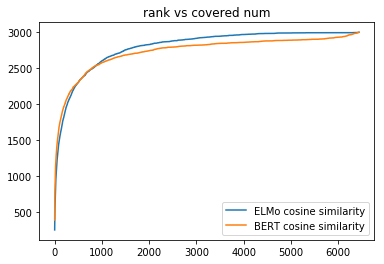

In [0]:
plt.plot(range(len(grants)), positive_counts_naive, label="ELMo cosine similarity")
plt.plot(range(len(grants)), positive_counts_naive_BERT, label="BERT cosine similarity")
plt.title("rank vs covered num")
plt.legend()
plt.show()

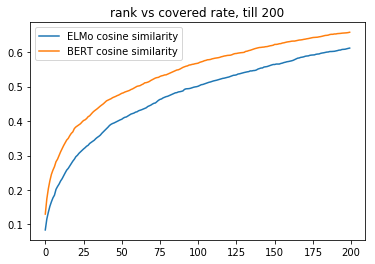

In [0]:
plt.plot(range(200), (np.array(positive_counts_naive)/len(ranking_naive))[0:200], label="ELMo cosine similarity")
plt.plot(range(200), (np.array(positive_counts_naive_BERT)/len(ranking_naive_BERT))[0:200], label="BERT cosine similarity")
plt.title("rank vs covered rate, till 200")
plt.legend()
plt.show()

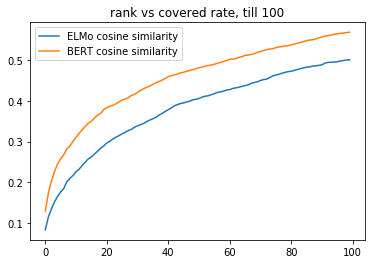

In [0]:
plt.plot(range(100), (np.array(positive_counts_naive)/len(ranking_naive))[0:100], label="ELMo cosine similarity")
plt.plot(range(100), (np.array(positive_counts_naive_BERT)/len(ranking_naive_BERT))[0:100], label="BERT cosine similarity")
plt.title("rank vs covered rate, till 100")
plt.legend()
plt.show()

In [0]:
print("BERT top 100 : {}".format( (np.array(positive_counts_naive_BERT)/len(ranking_naive_BERT))[100]))
print("BERT top 200 : {}".format( (np.array(positive_counts_naive_BERT)/len(ranking_naive_BERT))[200]))
print("ELMo top 100 : {}".format( (np.array(positive_counts_naive)/len(ranking_naive))[100]))
print("ELMo top 200 : {}".format( (np.array(positive_counts_naive)/len(ranking_naive))[200]))

BERT top 100 : 0.5683333333333334
BERT top 200 : 0.6586666666666666
ELMo top 100 : 0.5013333333333333
ELMo top 200 : 0.6133333333333333


#Universal sentence encoder (only using Claims), cosine similarity

In [0]:
GS_BASE="gs://mlstudy-phys/data/results"
TEST_FEATURE_FNAME="USE_test_app_3000_feature.pkl.gz"
GRANTS_FEATURE_FNAME="USE_grants_3000+3000_feature.pkl.gz"

!gsutil cp {GS_BASE}/{TEST_FEATURE_FNAME} ./{TEST_FEATURE_FNAME}
!gsutil cp {GS_BASE}/{GRANTS_FEATURE_FNAME} ./{GRANTS_FEATURE_FNAME}

test_USE_f = pd.read_pickle(f"./{TEST_FEATURE_FNAME}")
grant_USE_f = pd.read_pickle(f"./{GRANTS_FEATURE_FNAME}")

Copying gs://mlstudy-phys/data/results/USE_test_app_3000_feature.pkl.gz...
/ [1 files][  6.2 MiB/  6.2 MiB]                                                
Operation completed over 1 objects/6.2 MiB.                                      
Copying gs://mlstudy-phys/data/results/USE_grants_3000+3000_feature.pkl.gz...
- [1 files][ 13.3 MiB/ 13.3 MiB]                                                
Operation completed over 1 objects/13.3 MiB.                                     


In [0]:
test_USE_f.shape, grant_USE_f.shape

((3000, 512), (6440, 512))

In [0]:
%%time

import numpy as np

sim_naive_USE = []

for i in range(len(test_USE_f)):
  temp = []
  
  for j in range(len(grant_USE_f)):
    sim = np.dot(test_USE_f[i] , grant_USE_f[j]) / (np.linalg.norm(test_USE_f[i]) * np.linalg.norm(grant_USE_f[j]))
    temp.append(sim)
    
  sim_naive_USE.append(temp)

CPU times: user 4min 6s, sys: 907 ms, total: 4min 7s
Wall time: 4min 7s


In [0]:
%%time

ranking_naive_USE = []

for num in range(len(sim_naive_USE)):

  app_id = test_app["app_id"][num]
  label = pd.Series(test_label(app_id, grants, cite_relation))
    
  i, = np.where(label == 1)
  cited_index = i[0]
  rank = sorted(sim_naive_USE[num], reverse=True).index(sim_naive_USE[num][cited_index])
  ranking_naive_USE.append(rank)

CPU times: user 41.8 s, sys: 13 ms, total: 41.8 s
Wall time: 41.8 s


In [0]:
%%time

ranking_arr_naive_USE = np.array(ranking_naive_USE)

positive_counts_naive_USE = [sum(ranking_arr_naive_USE <= thrd) for thrd in range(len(grants))]

CPU times: user 41 s, sys: 3.94 ms, total: 41 s
Wall time: 41 s


#Word2vec cosine similarity

In [0]:
#loading the results

!gsutil cp gs://mlstudy-phys/data/results/w2v_similarities.pkl.gz ./

sim_naive_w2v = pd.read_pickle(f"./w2v_similarities.pkl.gz")

Copying gs://mlstudy-phys/data/results/w2v_similarities.pkl.gz...
| [1 files][200.8 MiB/200.8 MiB]                                                
Operation completed over 1 objects/200.8 MiB.                                    


In [0]:
np.array(sim_naive_w2v).shape

(3000, 6440)

In [0]:
%%time

ranking_naive_w2v = []

for num in range(len(sim_naive_w2v)):

  app_id = test_app["app_id"][num]
  label = pd.Series(test_label(app_id, grants, cite_relation))
    
  i, = np.where(label == 1)
  cited_index = i[0]
  rank = sorted(sim_naive_w2v[num], reverse=True).index(sim_naive_w2v[num][cited_index])
  ranking_naive_w2v.append(rank)

CPU times: user 42.4 s, sys: 11.9 ms, total: 42.4 s
Wall time: 42.4 s


In [0]:
%%time

ranking_arr_naive_w2v = np.array(ranking_naive_w2v)

positive_counts_naive_w2v = [sum(ranking_arr_naive_w2v <= thrd) for thrd in range(len(grants))]

CPU times: user 39.4 s, sys: 6.05 ms, total: 39.4 s
Wall time: 39.4 s


#Results

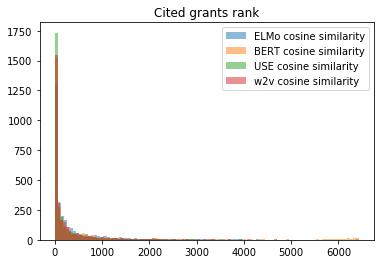

In [0]:
import matplotlib.pyplot as plt

plt.hist(ranking_naive, alpha=0.5, bins=100, label="ELMo cosine similarity")
plt.hist(ranking_naive_BERT, alpha=0.5, bins=100, label="BERT cosine similarity")
plt.hist(ranking_naive_USE, alpha=0.5, bins=100, label="USE cosine similarity")
plt.hist(ranking_naive_w2v, alpha=0.5, bins=100, label="w2v cosine similarity")
plt.title("Cited grants rank")
plt.legend()
plt.show()

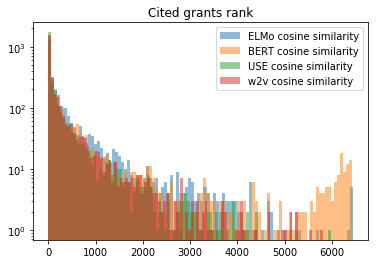

In [0]:
import matplotlib.pyplot as plt

plt.hist(ranking_naive, alpha=0.5, bins=100, label="ELMo cosine similarity")
plt.hist(ranking_naive_BERT, alpha=0.5, bins=100, label="BERT cosine similarity")
plt.hist(ranking_naive_USE, alpha=0.5, bins=100, label="USE cosine similarity")
plt.hist(ranking_naive_w2v, alpha=0.5, bins=100, label="w2v cosine similarity")
plt.yscale('log')
plt.title("Cited grants rank")
plt.legend()
plt.show()

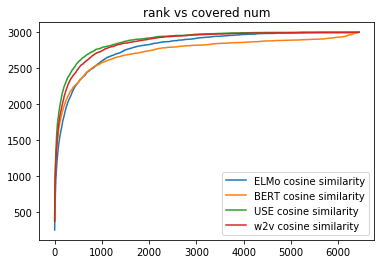

In [0]:
plt.plot(range(len(grants)), positive_counts_naive, label="ELMo cosine similarity")
plt.plot(range(len(grants)), positive_counts_naive_BERT, label="BERT cosine similarity")
plt.plot(range(len(grants)), positive_counts_naive_USE, label="USE cosine similarity")
plt.plot(range(len(grants)), positive_counts_naive_w2v, label="w2v cosine similarity")
plt.title("rank vs covered num")
plt.legend()
plt.show()

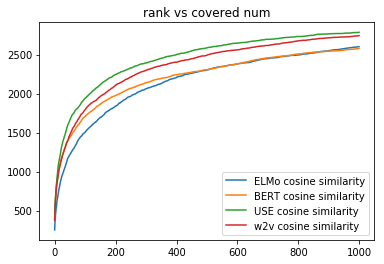

In [0]:
plt.plot(range(1000), positive_counts_naive[0:1000], label="ELMo cosine similarity")
plt.plot(range(1000), positive_counts_naive_BERT[0:1000], label="BERT cosine similarity")
plt.plot(range(1000), positive_counts_naive_USE[0:1000], label="USE cosine similarity")
plt.plot(range(1000), positive_counts_naive_w2v[0:1000], label="w2v cosine similarity")
plt.title("rank vs covered num")
plt.legend()
plt.show()

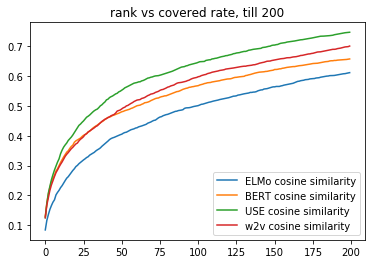

In [0]:
plt.plot(range(200), (np.array(positive_counts_naive)/len(ranking_naive))[0:200], label="ELMo cosine similarity")
plt.plot(range(200), (np.array(positive_counts_naive_BERT)/len(ranking_naive_BERT))[0:200], label="BERT cosine similarity")
plt.plot(range(200), (np.array(positive_counts_naive_USE)/len(ranking_naive_USE))[0:200], label="USE cosine similarity")
plt.plot(range(200), (np.array(positive_counts_naive_w2v)/len(ranking_naive_w2v))[0:200], label="w2v cosine similarity")
plt.title("rank vs covered rate, till 200")
plt.legend()
plt.show()

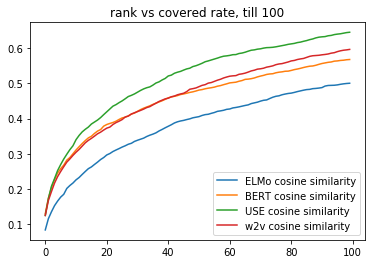

In [0]:
plt.plot(range(100), (np.array(positive_counts_naive)/len(ranking_naive))[0:100], label="ELMo cosine similarity")
plt.plot(range(100), (np.array(positive_counts_naive_BERT)/len(ranking_naive_BERT))[0:100], label="BERT cosine similarity")
plt.plot(range(100), (np.array(positive_counts_naive_USE)/len(ranking_naive_USE))[0:100], label="USE cosine similarity")
plt.plot(range(100), (np.array(positive_counts_naive_w2v)/len(ranking_naive_w2v))[0:100], label="w2v cosine similarity")
plt.title("rank vs covered rate, till 100")
plt.legend()
plt.show()

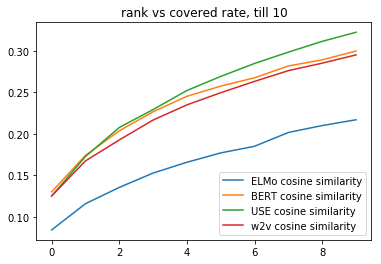

In [0]:
plt.plot(range(10), (np.array(positive_counts_naive)/len(ranking_naive))[0:10], label="ELMo cosine similarity")
plt.plot(range(10), (np.array(positive_counts_naive_BERT)/len(ranking_naive_BERT))[0:10], label="BERT cosine similarity")
plt.plot(range(10), (np.array(positive_counts_naive_USE)/len(ranking_naive_USE))[0:10], label="USE cosine similarity")
plt.plot(range(10), (np.array(positive_counts_naive_w2v)/len(ranking_naive_w2v))[0:10], label="w2v cosine similarity")
plt.title("rank vs covered rate, till 10")
plt.legend()
plt.show()

In [0]:
print("BERT top 10  : {}".format( (np.array(positive_counts_naive_BERT)/len(ranking_naive_BERT))[10]))
print("BERT top 100 : {}".format( (np.array(positive_counts_naive_BERT)/len(ranking_naive_BERT))[100]))
print("BERT top 200 : {}\n".format( (np.array(positive_counts_naive_BERT)/len(ranking_naive_BERT))[200]))
print("ELMo top 10  : {}".format( (np.array(positive_counts_naive)/len(ranking_naive))[10]))
print("ELMo top 100 : {}".format( (np.array(positive_counts_naive)/len(ranking_naive))[100]))
print("ELMo top 200 : {}\n".format( (np.array(positive_counts_naive)/len(ranking_naive))[200]))
print("USE top 10   : {}".format( (np.array(positive_counts_naive_USE)/len(ranking_naive_USE))[10]))
print("USE top 100  : {}".format( (np.array(positive_counts_naive_USE)/len(ranking_naive_USE))[100]))
print("USE top 200  : {}\n".format( (np.array(positive_counts_naive_USE)/len(ranking_naive_USE))[200]))
print("w2v top 10   : {}".format( (np.array(positive_counts_naive_w2v)/len(ranking_naive_w2v))[10]))
print("w2v top 100  : {}".format( (np.array(positive_counts_naive_w2v)/len(ranking_naive_w2v))[100]))
print("w2v top 200  : {}\n".format( (np.array(positive_counts_naive_w2v)/len(ranking_naive_w2v))[200]))

BERT top 10  : 0.31066666666666665
BERT top 100 : 0.5683333333333334
BERT top 200 : 0.6586666666666666

ELMo top 10  : 0.226
ELMo top 100 : 0.5013333333333333
ELMo top 200 : 0.6133333333333333

USE top 10   : 0.34
USE top 100  : 0.6466666666666666
USE top 200  : 0.748

w2v top 10   : 0.30433333333333334
w2v top 100  : 0.5983333333333334
w2v top 200  : 0.7023333333333334

